# The code here is for calculating the importance of each attributes

In [1]:
import csv
import pandas as pd
import numpy as np


In [30]:
# movie meta data
movie_Info = pd.read_csv('tmdb-movies.csv')
# movie_Info.head()
# movie_Info.shape
movie_Info.head
drop_cols = ['revenue_adj','budget_adj','release_date','overview','keywords','tagline','homepage']
movie_Info.drop(drop_cols, inplace=True, axis=1)
print(movie_Info)


           id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...      

In [31]:
movie_Info.to_csv('movie_info.csv',index = False)

In [98]:
movie_Info = pd.read_csv('movie_info.csv')
# print(movie_Info.genres)


In [ ]:
# split function-----
def split_values(data):
    nan_index = []
    # u_genres = []
    column_list = movie_Info[data].to_list()
    for g in range(len(column_list)):
        try:
            column_list[g] = column_list[g].replace(" ", "").split('|')

        except:
            nan_index.append(g)
    print(len(nan_index))
    movie_Info[data] = column_list
    # return nan_index, column_list
    # print(nan_index)


# --genres--

# --director--
# index, col_List = split_values("director")
# print(col_List)
# --cast--

# --all col--
multi_values = ['cast','director','genres','production_companies']
for col in multi_values:
    split_values(col)
# print(movie_Info)



In [100]:
# print(movie_Info.shape)
nan_values = movie_Info[movie_Info.isna().any(axis=1)]
print(len(nan_values))
# dic = {'A': [1, 4, 1, 4], 'B': [9, 2, 5, 3], 'C': [0, 0, 5, 3]}
# df = pd.DataFrame(dic)
# df['A'] = [5,5,5,5]
# print(df)
movie_Info = movie_Info.dropna()
print(movie_Info.shape)
# print(movie_Info)


1095
(9771, 14)


In [5]:
# --title--
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [366]:
import re

num = r'[0-9]+'
def clean_string(text):
    text = [''.join(c for c in s if c not in string.punctuation) for s in text]
    text = [word.lower() for word in text]
    text = [''.join(c for c in s if c not in num) for s in text]
    return text
# def clean_string(text):
#     text = ''.join([word for word in text if word not in string.punctuation])
#     text = text.lower()
#     text = ' '.join([word for word in text.split() if word not in stopwords])
#     text = re.sub(num, '', text)
#     return text    

# sentences = ['123','234']

movies['keywords'] = list(map(clean_string, movies['keywords']))
# print(movie_Info['original_title'])
# for col in multi_values:
#     movie_Info[col] = list(map(clean_string, movie_Info[col]))
print(movies)



          id  popularity           original_title  \
0     135397   32.985763           jurassic world   
1      76341   28.419936        mad max fury road   
2     262500   13.112507                insurgent   
3     140607   11.173104  star wars force awakens   
4     168259    9.335014                 furious    
...      ...         ...                      ...   
8596      21    0.080598           endless summer   
8597   20379    0.065543               grand prix   
8598   39768    0.065141      beregis avtomobilya   
8599   21449    0.064317         whats tiger lily   
8600   22293    0.035919         manos hands fate   

                                                   cast             director  \
0     [chrispratt, brycedallashoward, irrfankhan, vi...     [colintrevorrow]   
1     [tomhardy, charlizetheron, hughkeaysbyrne, nic...       [georgemiller]   
2     [shailenewoodley, theojames, katewinslet, anse...    [robertschwentke]   
3     [harrisonford, markhamill, carriefish

In [114]:
# movie_Info.drop(['imdb_id','runtime','vote_count','release_year'], inplace=True, axis=1)
movie_Info.to_csv('movie_info_fin.csv',index = False)
movie_Info_fin = pd.read_csv('movie_info_fin.csv')

In [367]:
# split original title
        # i remove the cell with this code accidently
movies['original_title'] = list(map(lambda x: list(x.split(" ")), movies['original_title'].tolist()))
movies['original_title']  = list(map(lambda x: [ele for ele in x if ele.strip()], movies['original_title'].tolist()))

print(movies['original_title'])


0                  [jurassic, world]
1             [mad, max, fury, road]
2                        [insurgent]
3       [star, wars, force, awakens]
4                          [furious]
                    ...             
8596               [endless, summer]
8597                   [grand, prix]
8598          [beregis, avtomobilya]
8599            [whats, tiger, lily]
8600            [manos, hands, fate]
Name: original_title, Length: 8601, dtype: object


In [ ]:
# from ast import literal_eval
# keywords = pd.read_csv('keywords.csv')
# keywords['id'] = keywords['id'].astype('int')
# movies = movie_Info_fin.merge(keywords, on='id')
print(movies)

movies.to_csv('movies_fin.csv',index = False)
# movies['keywords'] = movies['keywords'].apply(literal_eval)
# movies['keywords'] = movies['keywords'].apply(lambda x: [i['name'].lower() for i in x])
# movies['keywords'] = movies['keywords'].apply(lambda x: x[:3] if len(x)>3 else x)
# movies['keywords'] = movies['keywords'].apply(lambda x: [i.replace(' ','') for i in x])



In [191]:
# import ast
# movies = pd.read_csv('movies_fin.csv')
print(movies.shape)
# movies.drop(['budget','revenue'], inplace=True, axis=1)
movies.to_csv('movies_fin3.csv',index = False)
# movies['keywords'] = [pd.NA if not ast.literal_eval(k) else ast.literal_eval(k) for k in movies.keywords.tolist()]
# movies = movies.dropna(how='any')           # assign back
# movies.dropna(how='any', inplace=True)  # set inplace parameter





(8601, 9)


In [30]:
from ast import literal_eval
movies = pd.read_csv('movies_wo_padding.csv')
# # literal_eval first
all_cols = ['original_title','cast','director','genres','production_companies','keywords']
# # #changing columns into python objects
for c in all_cols:
    movies[c] = movies[c].apply(literal_eval)
    # movies[c] = movies[c].to_numpy()

# print(type(movies['cast'][0]))
# print(movies['cast'][6][2])
# print(movies['director'][0][0])
# print(movies)

# movies['str_metadata'] = movies.apply(lambda x : ' '.join(x['cast']) + ' ' + ' '.join(x['director']) + ' ' + ' '.join(x['genres']) + ' '+ ' '.join(x['production_companies'])+ ' ' + ' '.join(x['keywords']), axis = 1)
# print(movies.str_metadata)

In [543]:
print(movies)

          id  popularity       original_title                   cast director  \
0     135397   32.985763          [3336, 293]     [5794, 3503, 4400]   [9684]   
1      76341   28.419936   [1071, 1513, 1713]      [1388, 359, 8363]   [1641]   
2     262500   13.112507               [7354]      [2879, 8364, 360]   [3739]   
3     140607   11.173104    [260, 1208, 2741]      [227, 1389, 2431]   [2955]   
4     168259    9.335014               [2742]        [746, 688, 347]   [2169]   
...      ...         ...                  ...                    ...      ...   
8596      21    0.080598          [7471, 494]  [21019, 21020, 21021]  [23173]   
8597   20379    0.065543        [2766, 15539]     [1438, 4752, 9646]   [1463]   
8598   39768    0.065141       [15540, 15541]  [21022, 21023, 21024]  [23174]   
8599   21449    0.064317  [2388, 1732, 15542]   [21025, 9656, 21026]     [80]   
8600   22293    0.035919  [15543, 3399, 8362]   [9683, 21027, 21028]   [9683]   

         genres  production

In [374]:
# length list in a nested list
 
def FindMaxLength(lst):
    maxList = max(lst, key = lambda i: len(i))
    maxLength = max(len(x) for x in lst )
 
    return maxList, maxLength
     
# Driver Code
str_col = ['original_title','cast','director','genres','production_companies','keywords']
for c in str_col:
    lst = movies[c]
    print(FindMaxLength(lst))

(['chacun', 'son', 'cinema', 'ou', 'ce', 'petit', 'coup', 'au', 'coeur', 'quand', 'la', 'lumiere', 'seteint', 'et', 'que', 'le', 'film', 'commence'], 18)
(['chrispratt', 'brycedallashoward', 'irrfankhan'], 3)
(['roxannebenjamin', 'davidbruckner', 'patrickhorvath'], 3)
(['action', 'adventure', 'sciencefiction'], 3)
(['universalstudios', 'amblinentertainment', 'legendarypictures'], 3)
(['monster', 'dna', 'tyrannosaurusrex'], 3)


In [377]:

# movies.drop(['id'], inplace=True, axis=1)
cols_wo_title = ['original_title','cast','director','genres','production_companies','keywords']
for c in cols_wo_title:
    movies[c] = movies[c].apply(lambda x: x[:3] if len(x)>3 else x)

In [375]:
from statistics import mean
import numpy as np
# list(map(np.mean, movies['original_title'].tolist()))
temp = []
# str_col = ['original_title','cast','director','genres','production_companies','keywords']
# for c in str_col:
temp = list(map(lambda x: len(x), movies['original_title'].tolist()))
print(mean(temp)) #ave = 2.03，我算4

2.0302290431345194


In [376]:
print(movies['original_title'])

0                  [jurassic, world]
1             [mad, max, fury, road]
2                        [insurgent]
3       [star, wars, force, awakens]
4                          [furious]
                    ...             
8596               [endless, summer]
8597                   [grand, prix]
8598          [beregis, avtomobilya]
8599            [whats, tiger, lily]
8600            [manos, hands, fate]
Name: original_title, Length: 8601, dtype: object


In [379]:
from keras_preprocessing.text import Tokenizer
all_str_col = ['original_title','cast','director','genres','production_companies','keywords']
col_concat = []
# dict makes from whole features' words
for c in all_str_col:
    col_concat.extend(movies[c].tolist())
# embedding for each col
for c in all_str_col:
    token = Tokenizer()
    token.fit_on_texts(col_concat)
    movies[c] = token.texts_to_sequences(movies[c].tolist())



In [ ]:
print(movies)
# print(type(movies.cast))

In [460]:
# test_movies = movies
# print(test_movies)
# movies.to_csv('movies_wo_padding.csv',index = False)
movies = pd.read_csv('movies_wo_padding.csv')

In [32]:
from keras.preprocessing import sequence
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
all_cols = ['original_title','cast','director','genres','production_companies','keywords']
# -------popularity, vote_average to list------------
# def tolst(value):
#     temp = []
#     temp.append(round(value, 2))
#     return temp
# movies['vote_average'] = list(map(tolst, movies['vote_average']))

# paddind dataset-------------------
for feature in all_cols:
    movies[feature] = list(sequence.pad_sequences(movies[feature].tolist(), maxlen = 3, dtype='float32'))
# print(movies)

# ----data normalization-----
scaler = StandardScaler()
for feature in all_cols:
    movies[feature] = list(scaler.fit_transform(movies[feature].tolist()))
# normalized_movies = scaler.fit_transform(test_movies)
print(movies)

          id  popularity                                     original_title  \
0     135397   32.985763  [-0.33657873094753044, 0.049547543890164705, -...   
1      76341   28.419936  [0.047539687999847424, -0.34824864560604335, -...   
2     262500   13.112507  [-0.33657873094753044, -0.6783998440195173, 0....   
3     140607   11.173104  [-0.24332869460176176, -0.4148025884455077, -0...   
4     168259    9.335014  [-0.33657873094753044, -0.6783998440195173, -0...   
...      ...         ...                                                ...   
8596      21    0.080598  [-0.33657873094753044, 0.9518444410743777, -1....   
8597   20379    0.065543  [-0.33657873094753044, -0.07483195584260469, 1...   
8598   39768    0.065141  [-0.33657873094753044, 2.712578096063354, 1.76...   
8599   21449    0.064317  [0.5198869874897603, -0.30046073255082145, 1.7...   
8600   22293    0.035919  [5.23798017259971, 0.06329475175536553, 0.4288...   

                                                   

In [33]:
# test_movies = movies.copy()
# temp_movies = movies.copy()
# print(test_movies)
movies.drop(['id','popularity'], inplace=True, axis=1)
print(movies)

                                         original_title  \
0     [-0.33657873094753044, 0.049547543890164705, -...   
1     [0.047539687999847424, -0.34824864560604335, -...   
2     [-0.33657873094753044, -0.6783998440195173, 0....   
3     [-0.24332869460176176, -0.4148025884455077, -0...   
4     [-0.33657873094753044, -0.6783998440195173, -0...   
...                                                 ...   
8596  [-0.33657873094753044, 0.9518444410743777, -1....   
8597  [-0.33657873094753044, -0.07483195584260469, 1...   
8598  [-0.33657873094753044, 2.712578096063354, 1.76...   
8599  [0.5198869874897603, -0.30046073255082145, 1.7...   
8600  [5.23798017259971, 0.06329475175536553, 0.4288...   

                                                   cast  \
0     [0.25834723574560076, -0.4136894808318079, -0....   
1     [-0.48446764808847487, -0.8746723918249092, 0....   
2     [-0.23309747291902258, 0.2990452298353249, -1....   
3     [-0.6802025732204225, -0.723650636633149, -0.7...

In [563]:
# vote_ave = pd.read_csv('movies_fin3.csv')
# vote_ave = vote_ave['vote_average'].tolist()
# print(len(vote_ave))
# movies['vote_ave'] = vote_ave

movies.drop('vote_average', inplace=True, axis=1)
print(movies)

                             popularity  \
0                       [0.0, 0.0, 1.0]   
1         [0.0, 0.0, 0.861473132171564]   
2        [0.0, 0.0, 0.3973931188137645]   
3       [0.0, 0.0, 0.33858743582862005]   
4        [0.0, 0.0, 0.2831160860074853]   
...                                 ...   
8596  [0.0, 0.0, 0.0024249770882575667]   
8597  [0.0, 0.0, 0.0021218550086862698]   
8598  [0.0, 0.0, 0.0021218550086862698]   
8599   [0.0, 0.0, 0.001818732816193175]   
8600  [0.0, 0.0, 0.0012124885441287833]   

                                         original_title  \
0      [0.0, 0.21467181467181465, 0.018852142581392357]   
1     [0.06890561667631732, 0.09736164736164736, 0.1...   
2                        [0.0, 0.0, 0.4731694762578819]   
3     [0.016727787428424373, 0.07773487773487774, 0....   
4                       [0.0, 0.0, 0.17642517050572643]   
...                                                 ...   
8596    [0.0, 0.48075933075933075, 0.03178484107579462]   
8597       

In [40]:
# split features
# split_movies = movies.copy()
# all_cols = ['original_title','cast','director','genres','production_companies','vote_average','keywords']
# movies[['k1','k2','k3']] = pd.DataFrame(movies['keywords'].tolist(), index= movies.index)
# movies.drop('keywords', inplace=True, axis=1)

# print(type(split_movies['vote_ave']))
print(movies)

      vote_average        o1        o2        o3        c1        c2  \
0              6.5 -0.336579  0.049548 -1.077588  0.258347 -0.413689   
1              7.1  0.047540 -0.348249 -0.812474 -0.484468 -0.874672   
2              6.3 -0.336579 -0.678400  0.240700 -0.233097  0.299045   
3              7.5 -0.243329 -0.414803 -0.620547 -0.680203 -0.723651   
4              7.3 -0.336579 -0.678400 -0.620360 -0.592703 -0.826433   
...            ...       ...       ...       ...       ...       ...   
8596           7.4 -0.336579  0.951844 -1.040061  2.825155  2.154707   
8597           5.7 -0.336579 -0.074832  1.768839 -0.476038 -0.230557   
8598           6.5 -0.336579  2.712578  1.769212  2.825661  2.155147   
8599           5.4  0.519887 -0.300461  1.769399  2.826167  0.488482   
8600           1.5  5.237980  0.063295  0.428894  0.914000  2.155733   

            c3        d1        d2        d3        g1        g2        g3  \
0    -0.498351 -0.082826 -0.208722  0.167666  0.037082  0

In [74]:
# -----KNN------
# import libs
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LinearRegression
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [68]:
# print(split_movies)
# movies = split_movies.copy()
# moviews_with_newr = movies.copy()
# print(moviews_with_newr)
moviews_with_newr.drop('vote_average', inplace=True, axis=1)


In [91]:
#define training and validation split
# dep_var = 'vote_average'

cond = np.random.rand(len(moviews_with_newr))>.2
train = np.where(cond)[0]
valid = np.where(~cond)[0]

len(train), len(valid)

(6868, 1733)

In [77]:
# temp_movies = movies.copy()
# rating to 1/0
movies['rating'] = list(map(lambda x: 0 if x <= 3 else (1 if x>3 and x < 7 else 2)
, movies['vote_average'].tolist()))
print(movies.rating)

0       1
1       2
2       1
3       2
4       2
       ..
8596    2
8597    1
8598    1
8599    1
8600    0
Name: rating, Length: 8601, dtype: int64


In [ ]:
print(moviews_with_newr)

In [92]:
# moviews_with_newr = movies.copy()
# moviews_with_newr.drop('vote_average', inplace=True, axis=1)
train_df = moviews_with_newr.iloc[train]
valid_df = moviews_with_newr.iloc[valid]
len(train_df), len(valid_df)


(6868, 1733)

In [676]:
print(train_df)

      vote_ave        o1        o2        o3        c1        c2        c3  \
0          6.5  0.000000  0.214672  0.018852  0.275577  0.166595  0.206225   
1          7.1  0.068906  0.097362  0.110217  0.066017  0.017073  0.395408   
2          6.3  0.000000  0.000000  0.473169  0.136932  0.397774  0.013366   
4          7.3  0.000000  0.000000  0.176425  0.035482  0.032720  0.012746   
5          7.2  0.000000  0.000000  0.473234  0.020832  0.066010  0.206273   
...        ...       ...       ...       ...       ...       ...       ...   
8595       7.0  0.000000  0.071042  0.280466  0.102830  0.225662  0.410111   
8596       7.4  0.000000  0.480759  0.031785  0.999715  0.999667  0.999666   
8597       5.7  0.000000  0.177992  0.999807  0.068395  0.225995  0.456655   
8598       6.5  0.000000  1.000000  0.999936  0.999857  0.999810  0.999809   
8600       1.5  1.000000  0.218726  0.538026  0.460547  1.000000  1.000000   

       d1   d2        d3        g1        g2        g3        p

In [93]:
train_y = train_df['rating']
train_xs = train_df.drop('rating', axis = 1)


In [94]:
valid_y = valid_df['rating']
valid_xs = valid_df.drop('rating', axis = 1)

In [82]:
print(np.array(valid_y).shape)
print(np.array(valid_xs).shape)
# print(valid_xs)

(1739,)
(1739, 18)


In [63]:

# test with label_encoder
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(train_y)
list(lab_enc.classes_)

# encoded = lab_enc.fit_transform(train_y)
# print(encoded)


[1.5,
 2.1,
 2.2,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.0,
 7.1,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.0,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5]

In [95]:
#train model
# l = LinearRegression()
m =KNeighborsClassifier()
# train_xs = train_xs.to_numpy()
# train_y = np.array(train_y.tolist())
m = m.fit(train_xs, train_y)
# print(train_y[0])

0.8528563185227929


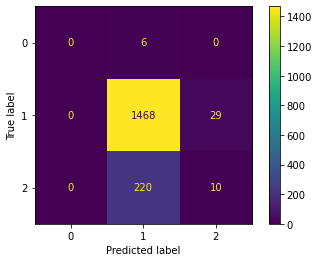

In [103]:
plot_confusion_matrix(estimator = m, X = valid_xs, y_true = valid_y)
std_score = m.score(valid_xs, valid_y) #0.02689143509348857
# use StandardScaler precision is higher   0.0386297664695866
print(std_score)

In [ ]:
data = {'o': [0], 'c': [0], 'd': [0], 'g': [0], 'p': [0], 'k': [0]}
feat_imp = pd.DataFrame(data)
feat_imp.head()

In [ ]:
# this result is rating to 3 class(0,1,2) and use knn to predict
valid_o = valid_xs.copy()
valid_o['o1'] = np.random.permutation(valid_o['o1'])
valid_o['o2'] = np.random.permutation(valid_o['o2'])
valid_o['o3'] = np.random.permutation(valid_o['o3'])
o_score = m.score(valid_o, valid_y)
feat_imp['o'] = std_score - o_score

valid_c = valid_xs.copy()
valid_c['c1'] = np.random.permutation(valid_c['c1'])
valid_c['c2'] = np.random.permutation(valid_c['c2'])
valid_c['c3'] = np.random.permutation(valid_c['c3'])

c_score = m.score(valid_c, valid_y) #0.02689143509348857

feat_imp['c'] = std_score - c_score
# feat_imp.head()

valid_d = valid_xs.copy()
valid_d['d1'] = np.random.permutation(valid_d['d1'])
valid_d['d2'] = np.random.permutation(valid_d['d2'])
valid_d['d3'] = np.random.permutation(valid_d['d3'])

d_score = m.score(valid_d, valid_y) #0.02689143509348857

feat_imp['d'] = std_score - d_score
# feat_imp.head()

valid_g = valid_xs.copy()
valid_g['g1'] = np.random.permutation(valid_g['g1'])
valid_g['g2'] = np.random.permutation(valid_g['g2'])
valid_g['g3'] = np.random.permutation(valid_g['g3'])

g_score = m.score(valid_g, valid_y) #0.02689143509348857

feat_imp['g'] = std_score - g_score
# feat_imp.head()

valid_p = valid_xs.copy()
valid_p['p1'] = np.random.permutation(valid_p['p1'])
valid_p['p2'] = np.random.permutation(valid_p['p2'])
valid_p['p3'] = np.random.permutation(valid_p['p3'])

p_score = m.score(valid_p, valid_y) #0.02689143509348857
# print(p_score)
feat_imp['p'] = std_score - p_score
# feat_imp.head()

valid_k = valid_xs.copy()
valid_k['k1'] = np.random.permutation(valid_k['k1'])
valid_k['k2'] = np.random.permutation(valid_k['k2'])
valid_k['k3'] = np.random.permutation(valid_k['k3'])

k_score = m.score(valid_k, valid_y) #0.02689143509348857

feat_imp['k'] = std_score - k_score
feat_imp.head()



In [105]:
print(feat_imp)

          o         c         d        g         p         k
0  0.002308 -0.000577  0.002308  0.00577  0.002308  0.008656
